<a href="https://colab.research.google.com/github/amitshakarchy/big-data-analysis/blob/main/HW_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment 8

**Question 1:** Select a book or a movie's subtitle, and find the locations that appear in the book/movie. Then, draw these locations on a map (at least 10 locations) (30pt). Connect the discovered locations with lines according to their order of appearance
in the book. For example, if location B appeared immediately after location A, then draw a line connecting locations A and B (20pt).

In [ ]:
!pip install turicreate
!pip install spaCy
!pip install pymongo
!pip install geopandas
!pip install descartes
!pip install geopy
!pip install folium
!pip install imageio

# Run this to make cartopy work with colab 
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install --no-binary shapely shapely --force


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Using cached Shapely-1.8.0.tar.gz (278 kB)
Skipping wheel build for shapely, due to binaries being disabled for it.
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.0
    Uninstalling Shapely-1.8.0:
      Successfully uninstalled Shapely-1.8.0
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the 

In [ ]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"aamitshakarchy","key":"58502e08e5c784b7d74c285da6f0a66f"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import spacy
nlp = spacy.load('en_core_web_lg')

# !python -m spacy download en_core_web_lg # Important! you need to restart runtime after install

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
!mkdir ./datasets
!mkdir ./datasets/friends_script

# download the dataset from Kaggle and unzip it
!kaggle datasets download divyansh22/friends-tv-show-script -p ./datasets/friends_script
!unzip ./datasets/friends_script/*.zip  -d ./datasets/friends_script/

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/friends_script’: File exists
friends-tv-show-script.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/friends_script/friends-tv-show-script.zip
replace ./datasets/friends_script/Friends_Transcript.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [11]:
txt_PATH = '/content/datasets/friends_script/Friends_Transcript.txt'
txt = open(txt_PATH,"r", encoding="utf8", errors="ignore").read()
len(txt)

4899189

In [12]:
txt_cropped = txt[:899189] # all of the text is too big for spacy, so I took part of it

In [15]:
# Select a book or a movie's subtitle, and find the locations that appear in the book/movie. 

def get_entites_dict_from_text(text):
    entities_dict= {}
    #using spaCy to get entities
    doc = nlp(text)
    for entity in doc.ents:
        label = entity.label_
        e = entity.text.lower()
        if  label not in entities_dict:
            entities_dict[label] = {}
        if e not in entities_dict[label]:
            entities_dict[label][e] = 0
        entities_dict[label][e] += 1
    return entities_dict


e  = get_entites_dict_from_text(txt_cropped)
locations = list(e['GPE'])
locations

['ross',
 'aruba',
 'poland',
 'florida',
 'las vegas',
 "-i'd",
 'connecticut',
 'schhteve',
 'wild kingdom',
 'leetch',
 'pittsburgh',
 'pheebs',
 'mississippi',
 'brooklyn heights',
 'cleveland',
 'bing',
 'hel-lo',
 'brooklyn',
 'yammon',
 'manhattan',
 'queens',
 'new york city',
 'milwaukee',
 'la la',
 'italy',
 'bermuda',
 "y'see",
 'rome',
 'lowell',
 'vail',
 'puerto rico',
 'turkey',
 'bethel',
 'santa',
 'splash',
 'minsk',
 'russia',
 'flench',
 'london',
 'new york',
 'monica',
 'lisbon',
 'poconos',
 'los angeles',
 'innsbruck',
 'miss. hello',
 "tampa bay's",
 'colonial williamsburg',
 'williamsburg',
 'aayah',
 'mira',
 'el viejo desnudo est',
 'jamestown',
 'virginia',
 'cincinnati',
 'camomile',
 'newark',
 'san francisco',
 'switzerland',
 'amsterdam',
 'pennsylvania',
 'san diego',
 'miami',
 'gunnersens',
 'scranton',
 "san diego's",
 'amish',
 'gerston',
 'celtics',
 'paris',
 'china',
 'paulo',
 'u.s.',
 'africa',
 "you're--",
 'canada',
 'narnia',
 'ta-da',
 'n

In [9]:
from geopy import Nominatim
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
from functools import lru_cache
import time

@lru_cache(maxsize=256)
def get_location(loc):
    time.sleep(3)
    return geolocator.geocode(loc)

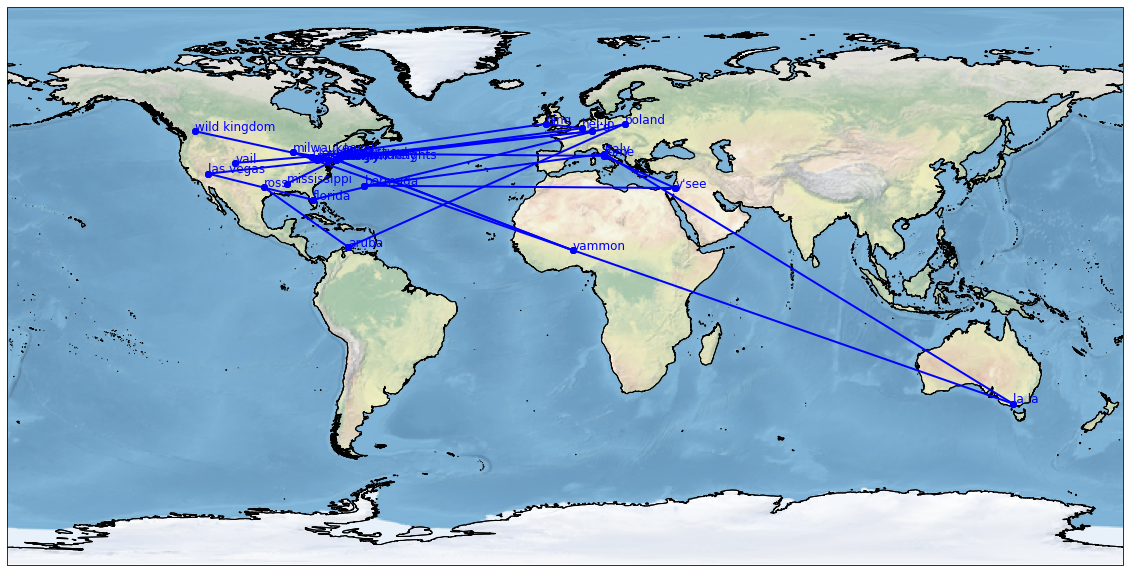

In [20]:
from geopy import Nominatim
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

geolocator = Nominatim()

plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines(resolution='10m', color='black', linewidth=1) # draw with batter coaslines resolution
ax.stock_img() # add colors 

locations = locations[:30]

for l in locations:
    location = geolocator.geocode(l)
    if location:
        lon, lat, name =  location.longitude, location.latitude, l
        plt.plot(lon, lat,
            color='black', marker='o', markersize=6,transform=ccrs.PlateCarree(),
            )
        ax.text(lon, lat+0.2, name, fontsize=12, color="blue", transform=ccrs.PlateCarree(),)

ax.coastlines(resolution='10m', color='black', linewidth=1) # draw with batter coaslines resolution


# draw lines by each two following items
for i in range(len(locations)-1):
  location1 = get_location(locations[i])
  location2 = get_location(locations[i+1])
  if location1 and location2:
    plt.plot([location1.longitude, location2.longitude], [location1.latitude, location2.latitude], color='blue', linewidth=2, marker='o',)

**Question 2:** Select a country's' statistic from the [World Development Indicators dataset](https://www.kaggle.com/worldbank/world-development-indicators) (Please notice there are several files in the dataset, such as _Indicators.csv_).
Then, create a choropleth map displaying how the selected statistics changed over time (15pt) 
    
**Bonus:** Create a short animation that displays how the chosen statistics changed over time (15pt)

In [ ]:
!kaggle datasets list -s world-development

No datasets found


In [ ]:
!mkdir datasets/worlddev
!kaggle datasets download kaggle/world-development-indicators -p ./datasets/worlddev
!unzip ./datasets/worlddev/*.zip  -d ./datasets/worlddev/
!ls ./datasets/worlddev/

mkdir: cannot create directory ‘datasets/worlddev’: File exists
world-development-indicators.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/worlddev/world-development-indicators.zip
replace ./datasets/worlddev/Country.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./datasets/worlddev/CountryNotes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./datasets/worlddev/Footnotes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./datasets/worlddev/Indicators.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./datasets/worlddev/Series.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./datasets/worlddev/SeriesNotes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./datasets/worlddev/database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./datasets/worlddev/hashes.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Country.csv	  Footnotes.csv   Series.csv
CountryNotes.csv  hashes.txt	  SeriesNotes.csv
datab

In [1]:
import turicreate as tc

sf = tc.SFrame.read_csv("./datasets/worlddev/Indicators.csv", )


Finished parsing file /content/datasets/worlddev/Indicators.csv

Parsing completed. Parsed 100 lines in 2.99364 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 528165 lines. Lines per second: 190421

Read 1580257 lines. Lines per second: 130117

Read 2616581 lines. Lines per second: 149940

Read 4145286 lines. Lines per second: 183312

Finished parsing file /content/datasets/worlddev/Indicators.csv

Parsing completed. Parsed 5656458 lines in 25.2872 secs.

In [3]:
sf["IndicatorName"]

dtype: str
Rows: 5656458
['Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Age dependency ratio (% of working-age population)', 'Age dependency ratio, old (% of working-age population)', 'Age dependency ratio, young (% of working-age population)', 'Arms exports (SIPRI trend indicator values)', 'Arms imports (SIPRI trend indicator values)', 'Birth rate, crude (per 1,000 people)', 'CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)', 'CO2 emissions from gaseous fuel consumption (% of total)', 'CO2 emissions from liquid fuel consumption (% of total)', 'CO2 emissions from liquid fuel consumption (kt)', 'CO2 emissions from solid fuel consumption (% of total)', 'Death rate, crude (per 1,000 people)', 'Fertility rate, total (births per woman)', 'Fixed telephone subscriptions', 'Fixed telephone subscriptions (per 100 people)', 'Hospital beds (per 1,000 people)', 'International migrant stock (% of population)', 'International migrant stock, total', 'Life expectancy at

In [4]:
sf = sf.filter_by('Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorName')
sf

Columns:
	CountryName	str
	CountryCode	str
	IndicatorName	str
	IndicatorCode	str
	Year	int
	Value	float

Rows: 12485

Data:
+--------------------------------+-------------+-------------------------------+
|          CountryName           | CountryCode |         IndicatorName         |
+--------------------------------+-------------+-------------------------------+
|           Arab World           |     ARB     | Adolescent fertility rate ... |
|     Caribbean small states     |     CSS     | Adolescent fertility rate ... |
| Central Europe and the Baltics |     CEB     | Adolescent fertility rate ... |
| East Asia & Pacific (all i...  |     EAS     | Adolescent fertility rate ... |
| East Asia & Pacific (devel...  |     EAP     | Adolescent fertility rate ... |
|           Euro area            |     EMU     | Adolescent fertility rate ... |
| Europe & Central Asia (all...  |     ECS     | Adolescent fertility rate ... |
| Europe & Central Asia (dev...  |     ECA     | Adolescent fertility rate ... |
|         European Union         |     EUU     | Adolescent fertility rate ... |
| Fragile and conflict affec...  |     FCS     | Adolescent fertility rate ... |
+--------------------------------+-------------+-------------------------------+
+---------------+------+--------------------+
| IndicatorCode | Year |       Value        |
+---------------+------+--------------------+
|  SP.ADO.TFRT  | 1960 | 133.56090740552298 |
|  SP.ADO.TFRT  | 1960 |  162.871211572184  |
|  SP.ADO.TFRT  | 1960 |  46.716751611392   |
|  SP.ADO.TFRT  | 1960 |  66.0159744792058  |
|  SP.ADO.TFRT  | 1960 |  75.0436305499244  |
|  SP.ADO.TFRT  | 1960 | 27.301838429626603 |
|  SP.ADO.TFRT  | 1960 |  42.0300522262526  |
|  SP.ADO.TFRT  | 1960 |  62.243602066685   |
|  SP.ADO.TFRT  | 1960 |  38.9987768165909  |
|  SP.ADO.TFRT  | 1960 |  141.09417161608   |
+---------------+------+--------------------+
[12485 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [6]:
!pip install plotly_express

In [7]:
import plotly_express as px
# import pycountry

df = sf.to_dataframe()
px.choropleth(df, locations='CountryCode', locationmode='ISO-3', color='Value',  animation_frame='Year')

# THAT IS SOOO COOL !!!!!

**Question 3:** Select a request type from [San Francisco 311 dataset](https://www.kaggle.com/datasf/case-data-from-san-francisco-311).
Create an interactive map that somehow presents in which areas this request occurs the most (35pt).

In [ ]:
!mkdir ./datasets
!mkdir ./datasets/san_fransisco

# download the dataset from Kaggle and unzip it
!kaggle datasets download -d datasf/case-data-from-san-francisco-311 -p ./datasets/san_fransisco
!unzip ./datasets/san_fransisco/*.zip  -d ./datasets/san_fransisco/

mkdir: cannot create directory ‘./datasets’: File exists
 99% 121M/122M [00:01<00:00, 116MB/s]
100% 122M/122M [00:01<00:00, 114MB/s]
Archive:  ./datasets/san_fransisco/case-data-from-san-francisco-311.zip
  inflating: ./datasets/san_fransisco/Case_Data_from_San_Francisco_311__SF311.csv  
  inflating: ./datasets/san_fransisco/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.dbf  
  inflating: ./datasets/san_fransisco/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.prj  
  inflating: ./datasets/san_fransisco/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.shp  
  inflating: ./datasets/san_fransisco/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.shx  
  inflating: ./datasets/san_fransisco/Shapefiles (2)/Supervisor Districts as of April 2012/geo_export_38fd3153-0303-488e-9f3c-0f81e8e00115.dbf  
  inflating: ./datasets/san_fransisco/Shapefil

In [ ]:
import folium
import geopandas
import turicreate as tc

Finished parsing file /content/datasets/san_fransisco/Case_Data_from_San_Francisco_311__SF311.csv

Parsing completed. Parsed 100 lines in 2.33266 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,str,str,int,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 189228 lines. Lines per second: 88972.2

Unexpected characters after last column. "Abandoned Vehicle - Car4door"
Parse failed at token ending at: 
	s Work Queue,Abandoned Vehicle,Abandoned Vehicle - Car4door,^Gray - Volkswagen -  - 7MJV079,Intersection of 2
Successfully parsed 16 tokens: 
	0: 5526685
	1: 02/02/2016 ... 5:55:47 AM
	2: 02/03/2016 ... 1:21:40 AM
	3: 02/03/2016 ... 1:21:40 AM
	4: Closed
	5: "Case Reso ... 1256715196
	6: -122.391840449142)"
	7: Voice In
	8: 5698025
	9: 03/24/2016 ... 8:34:48 PM
	10: 03/29/2016 ... 8:25:01 AM
	11: 3
	12: Closed
	13: DPT Abando ...       #229
	14: DPT Abando ... Work Queue
	15: Abandoned Vehicle

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "(415)-252-380"" as a integer
Parse failed at token ending at: 
	 (415)-252-380",^DPH - Environmental Health - G,General Requests,
Successfully parsed 0 tokens:

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "(415)-252-380"" as a integer
Parse failed at token ending at: 
	 (415)-252-380",^DPH - Environmental Health - G,Noise Report,mech
Successfully parsed 0 tokens:

Unexpected characters after last column. "DPW Ops Queue"
Parse failed at token ending at: 
	:00:36 AM,Closed,Case Resolved - duplicate sr,DPW Ops Queue,^Street and Sidewalk Cleaning,Illegal Encampment,
Successfully parsed 16 tokens: 
	0: 415
	1: DPH - Envi ... Health - G
	2: Street and ... k Cleaning
	3: Hazardous Materials
	4: Needles
	5: Intersecti ... and 8TH ST
	6: 10
	7: Showplace Square
	8: (37.767300 ... 428647996)
	9: Voice In
	10: 5698219
	11: 3
	12: 03/25/2016 ... 7:00:36 AM
	13: 03/25/2016 ... 7:00:36 AM
	14: Closed
	15: Case Resol ... plicate sr

Unexpected characters after last column. "DPW Ops Queue"
Parse failed at token ending at: 
	/2016 01:00:00 AM,Closed,Case Resolved - done,DPW Ops Queue,^Street and Sidewalk Cleaning,Hazardous Materials
Successfully parsed 16 tokens: 
	0: 415
	1: DPH - Envi ... Health - G
	2: Street and ... k Cleaning
	3: Hazardous Materials
	4: Needles
	5: Intersecti ...  HOWARD ST
	6: 6
	7: South of Market
	8: (37.773100 ... 561380814)
	9: Voice In
	10: 5698609
	11: 3
	12: 03/29/2016 ... 1:00:00 AM
	13: 03/29/2016 ... 1:00:00 AM
	14: Closed
	15: Case Resolved - done

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "(415)-252-380"" as a integer
Parse failed at token ending at: 
	 (415)-252-380",^DPH - Environmental Health - G,Noise Report,garb
Successfully parsed 0 tokens:

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Read 1043264 lines. Lines per second: 132285

16596 lines failed to parse correctly

Finished parsing file /content/datasets/san_fransisco/Case_Data_from_San_Francisco_311__SF311.csv

Parsing completed. Parsed 1161482 lines in 9.73255 secs.

Columns:
	CaseID	int
	Opened	str
	Closed	str
	Updated	str
	Status	str
	Status Notes	str
	Responsible Agency	str
	Category	str
	Request Type	str
	Request Details	str
	Address	str
	Supervisor District	int
	Neighborhood	str
	Point	str
	Source	str
	Media URL	str

Rows: 1161482

Data:
+--------+------------------------+------------------------+
| CaseID |         Opened         |         Closed         |
+--------+------------------------+------------------------+
| 322571 | 11/30/2008 11:53:00 PM | 12/01/2008 03:19:00 PM |
| 322568 | 11/30/2008 11:13:00 PM | 07/21/2009 04:24:00 PM |
| 322567 | 11/30/2008 11:07:00 PM | 12/27/2008 06:07:00 AM |
| 322566 | 11/30/2008 10:56:00 PM | 07/21/2009 04:24:00 PM |
| 322565 | 11/30/2008 10:46:00 PM | 12/13/2008 10:50:00 AM |
| 322564 | 11/30/2008 10:43:00 PM | 12/01/2008 04:07:00 PM |
| 322560 | 11/30/2008 10:24:00 PM | 07/21/2009 04:24:00 PM |
| 322559 | 11/30/2008 10:20:00 PM | 12/01/2008 06:07:00 AM |
| 322558 | 11/30/2008 10:04:00 PM | 11/30/2008 10:18:00 PM |
| 322556 | 11/30/2008 09:34:00 PM | 12/09/2008 08:07:00 AM |
+--------+------------------------+------------------------+
+------------------------+--------+--------------+
|        Updated         | Status | Status Notes |
+------------------------+--------+--------------+
| 12/01/2008 03:19:00 PM | Closed |              |
| 07/21/2009 04:24:00 PM | Closed |              |
| 12/27/2008 06:07:00 AM | Closed |              |
| 07/21/2009 04:24:00 PM | Closed |              |
| 12/13/2008 10:50:00 AM | Closed |              |
| 12/01/2008 04:07:00 PM | Closed |              |
| 07/21/2009 04:24:00 PM | Closed |              |
| 12/01/2008 06:07:00 AM | Closed |              |
| 11/30/2008 10:18:00 PM | Closed |              |
| 12/09/2008 08:07:00 AM | Closed |              |
+------------------------+--------+--------------+
+-------------------------------+------------------------------+
|       Responsible Agency      |           Category           |
+-------------------------------+------------------------------+
|    PUC - Electric/Power - G   |       General Requests       |
|         DPW Ops Queue         |       Illegal Postings       |
|         DPW Ops Queue         |       Illegal Postings       |
|         DPW Ops Queue         | Street and Sidewalk Cleaning |
| RPD Park Service Area GGP ... |    Rec and Park Requests     |
|         DPW Ops Queue         |   Graffiti Public Property   |
|         DPW Ops Queue         | Street and Sidewalk Cleaning |
|         DPW Ops Queue         | Street and Sidewalk Cleaning |
|   311 Service Request Queue   |     311 External Request     |
|         DPW Ops Queue         | Street and Sidewalk Cleaning |
+-------------------------------+------------------------------+
+-------------------------------+--------------------------------+
|          Request Type         |        Request Details         |
+-------------------------------+--------------------------------+
| puc - electric - request_f... | puc - electric - request_f...  |
| Illegal Postings - Posting... | Posting_Too_Large_in_Size ...  |
| Illegal Postings - Affixed... | Affixed_Improperly on Sidewalk |
|       Sidewalk_Cleaning       |            Garbage             |
| Park - Structural_Maintenance |             Other              |
| Offensive Graffiti on Publ... | Other_enter_additional_det...  |
|        Illegal_Dumping        |            Garbage             |
|        Illegal_Dumping        |            Mattress            |
|        Damaged_Property       |                                |
|       Sidewalk_Cleaning       |      Human_waste_or_urine      |
+-------------------------------+--------------------------------+
+-------------------------------+---------------------+-----------------------+
|            Address            | Supervisor District |      Neighborhood     |
+-------------------------------+---------------------+-----------------------+
| Intersection of 21ST ST an... |          9          |        

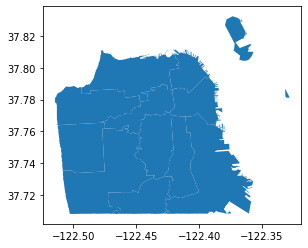

In [ ]:
gdf = geopandas.read_file("./datasets/san_fransisco/Shapefiles (2)/Supervisor Districts as of April 2012/geo_export_38fd3153-0303-488e-9f3c-0f81e8e00115.shp")
gdf.plot()
sf = tc.SFrame.read_csv("./datasets/san_fransisco/Case_Data_from_San_Francisco_311__SF311.csv")
sf.dropna()
sf

In [ ]:
# Select a request type from San Francisco 311 dataset.
Sidewalk_Cleaning_req = sf[sf['Request Type'] == 'Sidewalk_Cleaning']
Sidewalk_Cleaning_req


Columns:
	CaseID	int
	Opened	str
	Closed	str
	Updated	str
	Status	str
	Status Notes	str
	Responsible Agency	str
	Category	str
	Request Type	str
	Request Details	str
	Address	str
	Supervisor District	int
	Neighborhood	str
	Point	str
	Source	str
	Media URL	str

Rows: Unknown

Data:
+--------+------------------------+------------------------+
| CaseID |         Opened         |         Closed         |
+--------+------------------------+------------------------+
| 322566 | 11/30/2008 10:56:00 PM | 07/21/2009 04:24:00 PM |
| 322556 | 11/30/2008 09:34:00 PM | 12/09/2008 08:07:00 AM |
| 322545 | 11/30/2008 08:45:00 PM | 02/03/2009 07:09:00 AM |
| 322543 | 11/30/2008 08:43:00 PM | 02/03/2009 07:09:00 AM |
| 322514 | 11/30/2008 07:08:00 PM | 12/03/2008 06:07:00 AM |
| 322511 | 11/30/2008 06:50:00 PM | 12/01/2008 04:24:00 PM |
| 322505 | 11/30/2008 06:04:00 PM | 12/01/2008 06:07:00 AM |
| 322499 | 11/30/2008 05:34:00 PM | 11/30/2008 07:06:00 PM |
| 322488 | 11/30/2008 04:46:00 PM | 12/01/2008 06:07:00 AM |
| 322484 | 11/30/2008 04:22:00 PM | 12/01/2008 06:07:00 AM |
+--------+------------------------+------------------------+
+------------------------+--------+--------------+--------------------+
|        Updated         | Status | Status Notes | Responsible Agency |
+------------------------+--------+--------------+--------------------+
| 07/21/2009 04:24:00 PM | Closed |              |   DPW Ops Queue    |
| 12/09/2008 08:07:00 AM | Closed |              |   DPW Ops Queue    |
| 02/03/2009 07:09:00 AM | Closed |              |   DPW Ops Queue    |
| 02/03/2009 07:09:00 AM | Closed |              |   DPW Ops Queue    |
| 12/03/2008 06:07:00 AM | Closed |              |   DPW Ops Queue    |
| 12/01/2008 04:24:00 PM | Closed |              |   DPW Ops Queue    |
| 12/01/2008 06:07:00 AM | Closed |              |   DPW Ops Queue    |
| 11/30/2008 07:06:00 PM | Closed |              |   DPW Ops Queue    |
| 12/01/2008 06:07:00 AM | Closed |              |   DPW Ops Queue    |
| 12/01/2008 06:07:00 AM | Closed |              |   DPW Ops Queue    |
+------------------------+--------+--------------+--------------------+
+------------------------------+-------------------+----------------------+
|           Category           |    Request Type   |   Request Details    |
+------------------------------+-------------------+----------------------+
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Garbage        |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning | Human_waste_or_urine |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |      Empty_cart      |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Garbage        |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Mattress       |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning | Human_waste_or_urine |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Mattress       |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |    Medical_waste     |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Garbage        |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning | Human_waste_or_urine |
+------------------------------+-------------------+----------------------+
+-------------------------------+---------------------+------------------+
|            Address            | Supervisor District |   Neighborhood   |
+-------------------------------+---------------------+------------------+
| 1566 HYDE ST, SAN FRANCISC... |          3          |     Nob Hill     |
| Intersection of 25TH ST an... |          9          |     Mission      |
| Intersection of 19TH ST an... |          8          |     Mission      |
| Intersection of 18TH ST an... |          8          |     Mission      |
| Intersection of 26TH ST an... |          8          |     Mission      |
|  647 MINNA ST, SAN FRANCIS... |          6          | South of Market  |
| Intersection of DIVISADERO... |          5          | Western Addition |
| Intersection of MOUNT VERN... |          

In [ ]:
def get_points(point_str):
  ret_list = []
  l_points = point_str.split(",")
  for point in l_points:
    point = float(point.strip().replace("(", "").replace(")", ""))
    ret_list.append(point)
  return ret_list

In [ ]:
Sidewalk_Cleaning_req['new_Point'] = Sidewalk_Cleaning_req['Point'].apply(lambda s: get_points(s))
Sidewalk_Cleaning_req

Columns:
	CaseID	int
	Opened	str
	Closed	str
	Updated	str
	Status	str
	Status Notes	str
	Responsible Agency	str
	Category	str
	Request Type	str
	Request Details	str
	Address	str
	Supervisor District	int
	Neighborhood	str
	Point	str
	Source	str
	Media URL	str
	new_Point	array

Rows: 171590

Data:
+--------+------------------------+------------------------+
| CaseID |         Opened         |         Closed         |
+--------+------------------------+------------------------+
| 322566 | 11/30/2008 10:56:00 PM | 07/21/2009 04:24:00 PM |
| 322556 | 11/30/2008 09:34:00 PM | 12/09/2008 08:07:00 AM |
| 322545 | 11/30/2008 08:45:00 PM | 02/03/2009 07:09:00 AM |
| 322543 | 11/30/2008 08:43:00 PM | 02/03/2009 07:09:00 AM |
| 322514 | 11/30/2008 07:08:00 PM | 12/03/2008 06:07:00 AM |
| 322511 | 11/30/2008 06:50:00 PM | 12/01/2008 04:24:00 PM |
| 322505 | 11/30/2008 06:04:00 PM | 12/01/2008 06:07:00 AM |
| 322499 | 11/30/2008 05:34:00 PM | 11/30/2008 07:06:00 PM |
| 322488 | 11/30/2008 04:46:00 PM | 12/01/2008 06:07:00 AM |
| 322484 | 11/30/2008 04:22:00 PM | 12/01/2008 06:07:00 AM |
+--------+------------------------+------------------------+
+------------------------+--------+--------------+--------------------+
|        Updated         | Status | Status Notes | Responsible Agency |
+------------------------+--------+--------------+--------------------+
| 07/21/2009 04:24:00 PM | Closed |              |   DPW Ops Queue    |
| 12/09/2008 08:07:00 AM | Closed |              |   DPW Ops Queue    |
| 02/03/2009 07:09:00 AM | Closed |              |   DPW Ops Queue    |
| 02/03/2009 07:09:00 AM | Closed |              |   DPW Ops Queue    |
| 12/03/2008 06:07:00 AM | Closed |              |   DPW Ops Queue    |
| 12/01/2008 04:24:00 PM | Closed |              |   DPW Ops Queue    |
| 12/01/2008 06:07:00 AM | Closed |              |   DPW Ops Queue    |
| 11/30/2008 07:06:00 PM | Closed |              |   DPW Ops Queue    |
| 12/01/2008 06:07:00 AM | Closed |              |   DPW Ops Queue    |
| 12/01/2008 06:07:00 AM | Closed |              |   DPW Ops Queue    |
+------------------------+--------+--------------+--------------------+
+------------------------------+-------------------+----------------------+
|           Category           |    Request Type   |   Request Details    |
+------------------------------+-------------------+----------------------+
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Garbage        |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning | Human_waste_or_urine |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |      Empty_cart      |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Garbage        |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Mattress       |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning | Human_waste_or_urine |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Mattress       |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |    Medical_waste     |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning |       Garbage        |
| Street and Sidewalk Cleaning | Sidewalk_Cleaning | Human_waste_or_urine |
+------------------------------+-------------------+----------------------+
+-------------------------------+---------------------+------------------+
|            Address            | Supervisor District |   Neighborhood   |
+-------------------------------+---------------------+------------------+
| 1566 HYDE ST, SAN FRANCISC... |          3          |     Nob Hill     |
| Intersection of 25TH ST an... |          9          |     Mission      |
| Intersection of 19TH ST an... |          8          |     Mission      |
| Intersection of 18TH ST an... |          8          |     Mission      |
| Intersection of 26TH ST an... |          8          |     Mission      |
|  647 MINNA ST, SAN FRANCIS... |          6          | South of Market  |
| Intersection of DIVISADERO... |          5          | Western Addition |
| Intersection of MOUNT VER

In [ ]:
#  Create an interactive map that somehow presents in which areas this request occurs the most (35pt).

from folium.plugins import HeatMap

tiles = 'Stamen Terrain'
m = folium.Map(location=[0,0], zoom_start=2, tiles = tiles)
data = [(r['new_Point'][0],r['new_Point'][1]) for r in Sidewalk_Cleaning_req[:300000]]
HeatMap(data, radius = 10).add_to(m)

m